# Scraping Top Courses for Linkedin Learning using Selenium

## Introduction
### [Linkedin](https://www.linkedin.com/)
Linkedin is a social networking website for the professional life. Users can make connections with other people they have worked with, post their work experience and skills, look for jobs, and look for workers. It enables users to keep in track of the professional world.

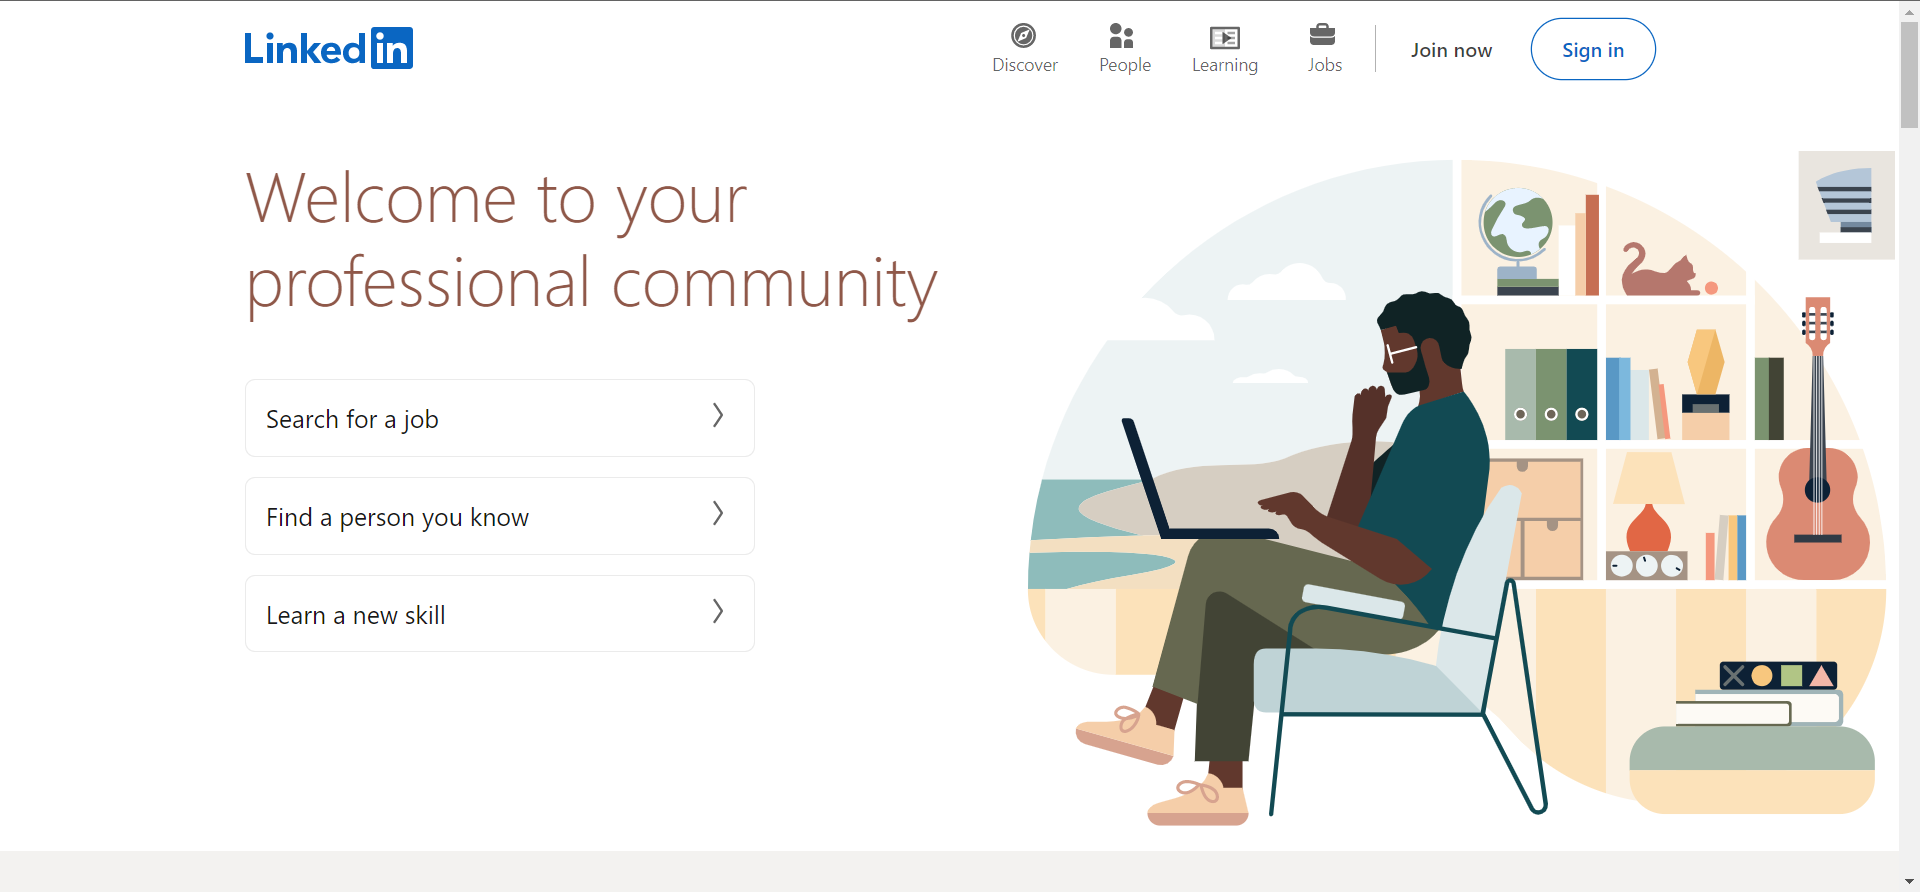

### [Linkedin Learning](https://www.linkedin.com/learning/)
Linkedin over the years have developed various other platforms which help in assisting the career and enhancing the skills. One such platform they introduced is Linkedin Learning. The platform provides various topics to browse through and picks the best suited topic for the profile. It includes topics in the filed of Business, Technology, Creative, and certificates. Apart from the various courses available, it also includes learning path modules for providing the right direction to proceed into any particular field.
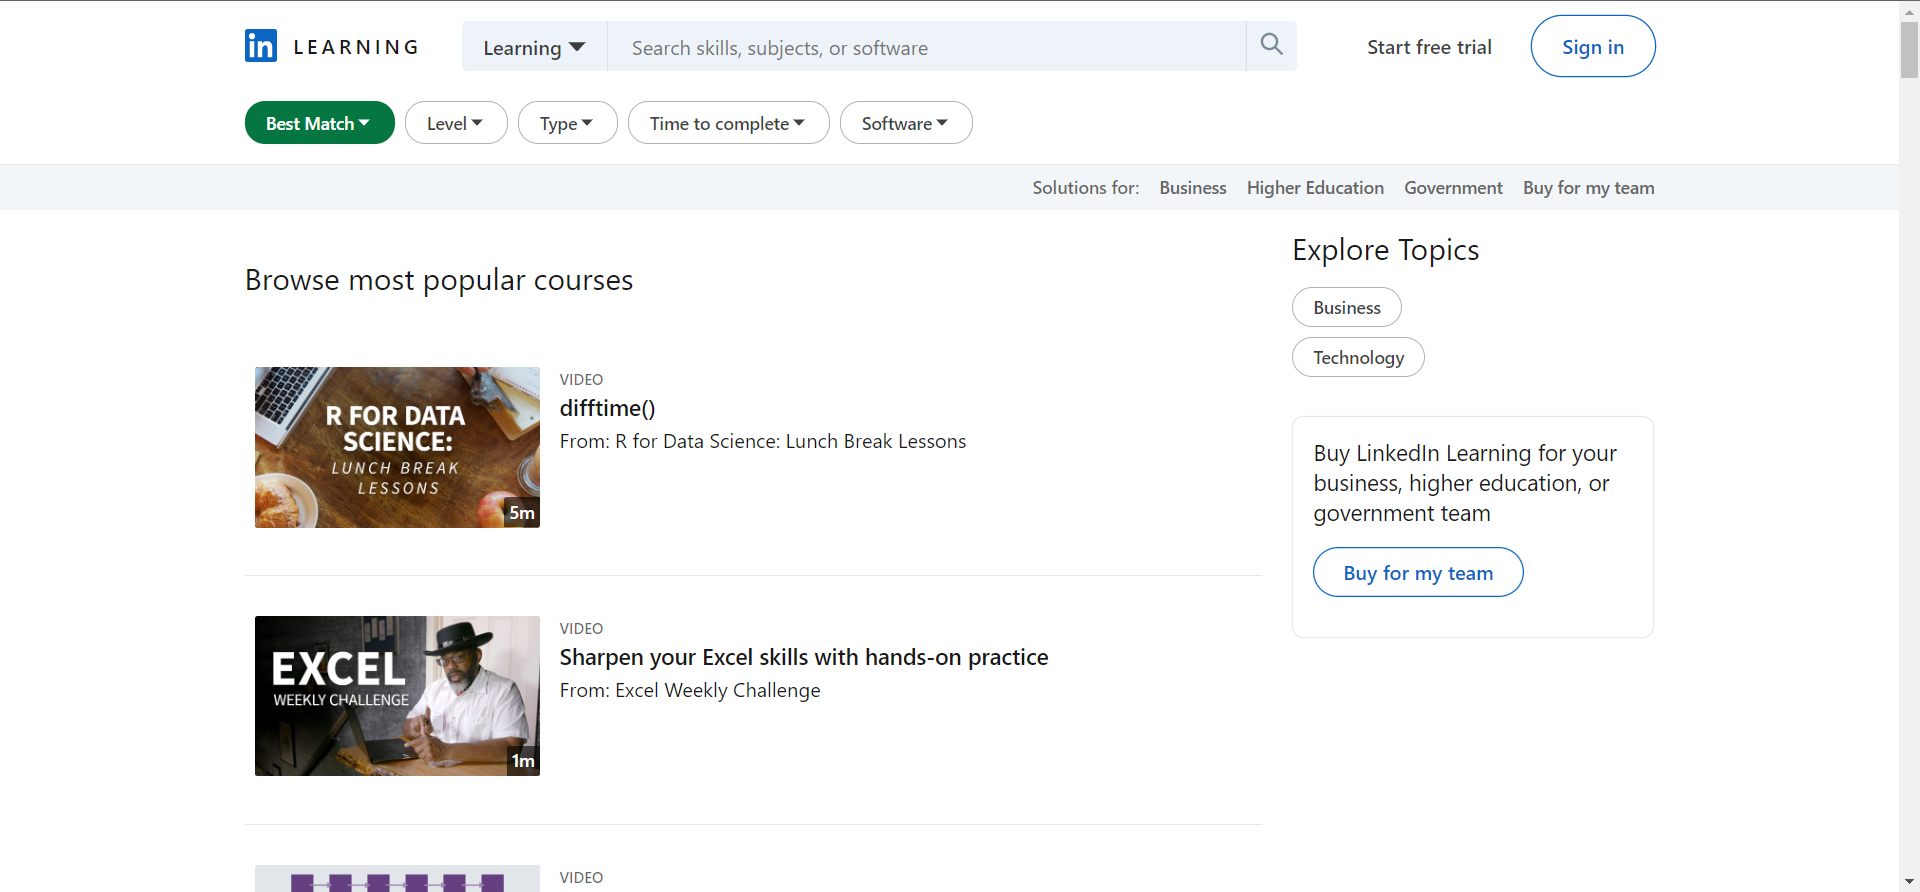

### [Web Scraping](https://www.geeksforgeeks.org/what-is-web-scraping-and-how-to-use-it/)
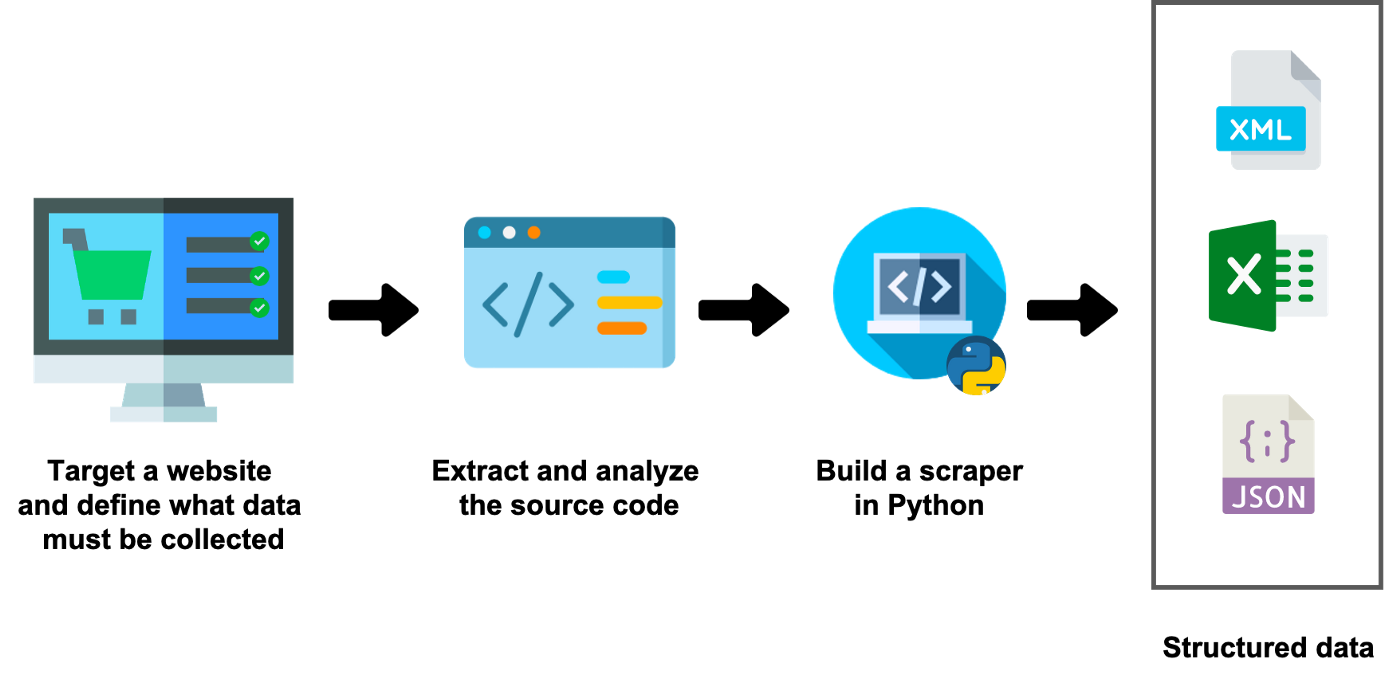
Web scraping is the technique of extracting the unstrutured information out of the webpage and convert it into a structured data using spreadsheets or any database. Various webscraping methods are used to scrape the data. For example, BeautifulSoup is a python package that helps in webscraping. Selenium is another Web UI used to automate webpages and extract the data. Depending upon the type of website, different methods and techniques are used to extract information. For the static web pages, BeautifulSoup can be used while to extract information out of a dynamic webpage, Selenium is the best suited option. Other available options are Crawl, Rest APIs and Scrapy.

### [LinkedinLearning - Technology](https://www.linkedin.com/learning/browse/technology)


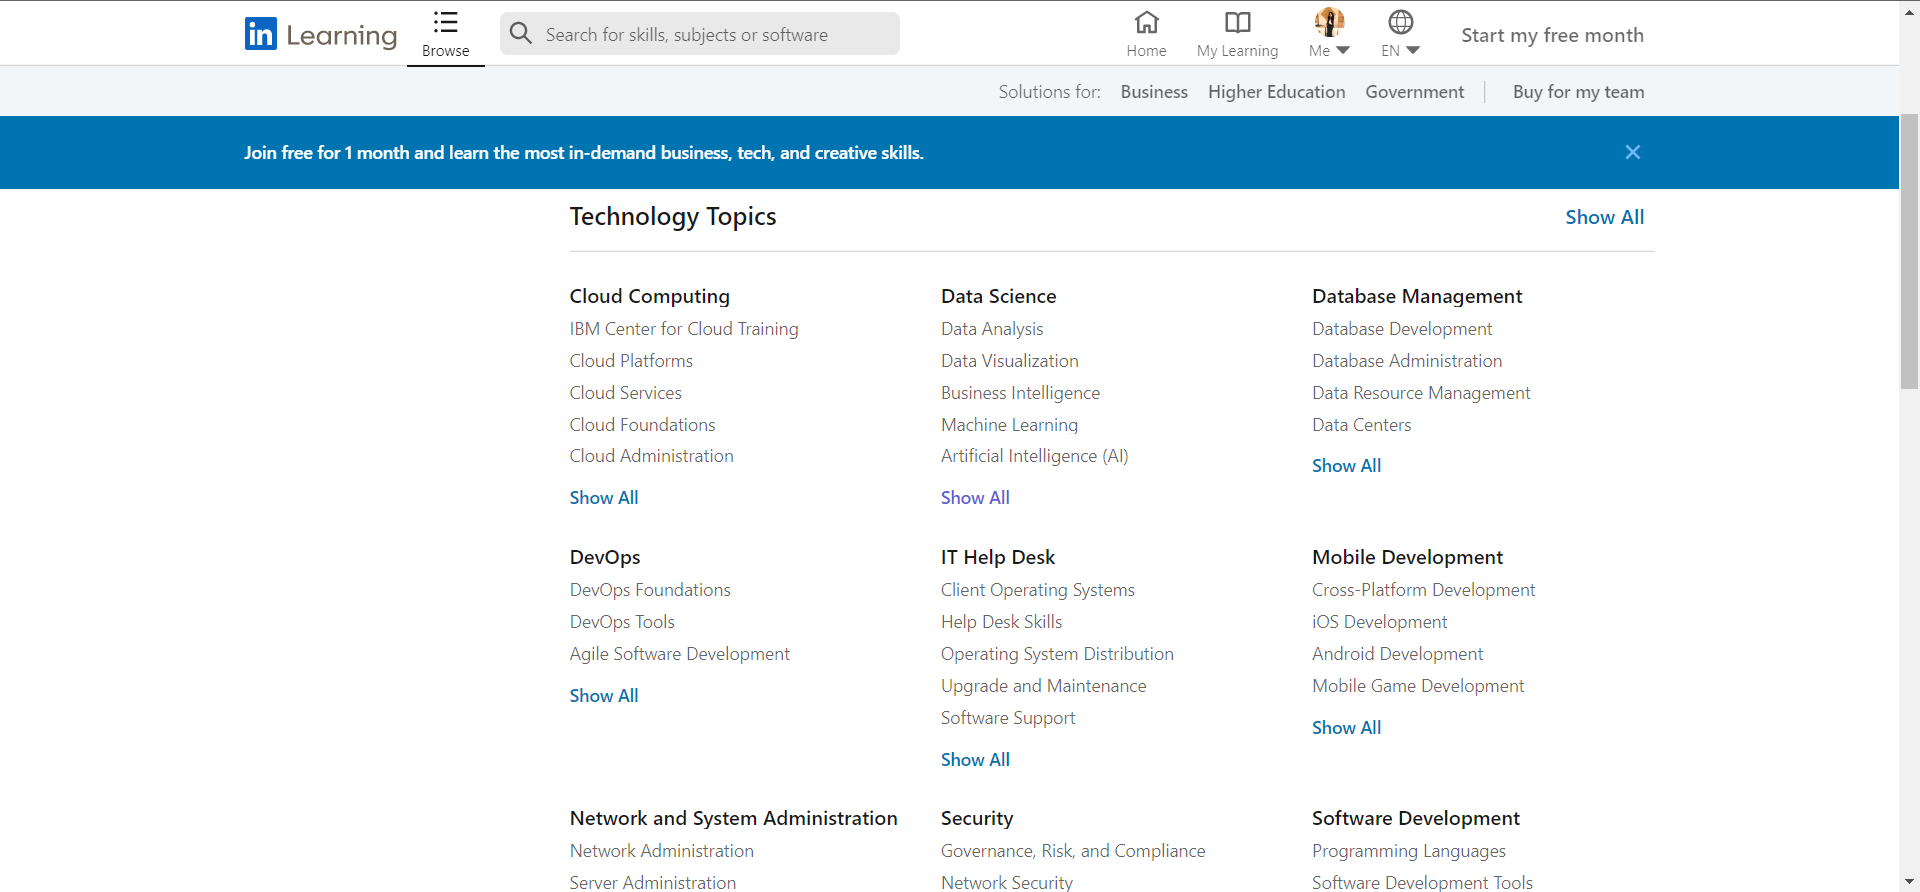

From the available categories to browse the topics, we will use "Technology" category to extract the available top courses in each category.


We will use the Python libraries [Selenium](https://www.selenium.dev/) to automate the dynamic website and to scrape the data, [Pandas](https://pandas.pydata.org/docs/) to store the extracted information in an organised form and [getpass](https://docs.python.org/3/library/getpass.html) to store the credentials securely.

## Outline of the Project

Here's an outline of the steps we'll follow:
1. Installing and Importing the required Python libraries and functions
2. Using the getpass function to login to the page.
3. Directing the webdriver to the particular url.
4. Parse the html sourse code using Selenium
5. Extracting all the required information by creating a function and storing the information in the form of Python dictionaries.
6. Saving the extracted information using the csv file.

#### By the end of the project, we will be able to create a csv file in the following format:
,course_title,course_url,number_of_learners,Difficulty_level,Skills_required,average_rating,date_of_release,course_duration
0,Understanding and Prioritizing Data Privacy,https://www.linkedin.com/learning/understanding-and-prioritizing-data-privacy,"63,959 learners",,"Skills: Data Privacy, Privacy Policies",4.6 Average rating 4.6 out of 5 (783 total ratings ),Updated Nov 2019,1h 14m........

## How to Run the Code?
You can execute the code using the "Run" button at the top of this page and selecting "Run locally".
Note: This project can be run on local computer. Please download the required [chrome driver](https://chromedriver.chromium.org/downloads) on your computer to execute.


## Installing and Importing the required libraries and functions:
* selenium - to automate the dynamic webpage
* time - function in python to give wait timing to the webpage to load
* pandas - to store the extracted information in a structured way

In [37]:
pip install selenium --quiet

Note: you may need to restart the kernel to use updated packages.


In [15]:
import time
import pandas as pd

#### Importing the required modules from the elenium library

In [17]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.common.exceptions import NoSuchElementExceptionam

## Using the getpass function to login to the page.
1. Importing the getpass module.
2. Defining the variables to store the user id and password.

In [18]:
import getpass 
user_id = str(input("Enter user name: "))
password = getpass.getpass("Enter Password : ")

Enter user name: bhavyab1375@gmail.com
Enter Password : ········


## Directing the webdriver to the particular url.
1. Creating a function get_driver() which directs the wwebpage to `https://www.linkedin.com/`.
2. Login details are passed in the webpage and login gets successfull.
3. Redirecting the driver to `https://www.linkedin.com/learning/topics/`.
4. Creating a function to input the topic name and hence the driver gets redirected to the topic page.

In [21]:
def get_driver():
    PATH = 'C:/Users/Bhavya/Downloads/chromedriver.exe'
    #Path defines the location of where the chrome driver is installed
    chrome_options = webdriver.ChromeOptions()
    chrome_options.add_argument("--start-maximized")
    chrome_options.add_argument("--disable-gpu")
    chrome_options.add_argument("--no-sandbox")
    chrome_options.add_argument("--disable-notifications")
    #chrome_options.add_argument('--headless')
    chrome_options.add_experimental_option('excludeSwitches', ['enable-logging'])
    chrome_options.add_experimental_option("excludeSwitches", ["enable-automation"])
    chrome_options.add_experimental_option('useAutomationExtension', False)
    driver = webdriver.Chrome(options=chrome_options,executable_path=PATH)
    #Directing the driver to access the particular web page
    driver.get("https://www.linkedin.com/")  
    WebDriverWait(driver,5).until(EC.visibility_of_all_elements_located((By.CSS_SELECTOR,"#session_key")))
    driver.find_element(By.CSS_SELECTOR, '#session_key').send_keys(user_id)
    driver.find_element(By.CSS_SELECTOR,'#session_password').send_keys(password)
    driver.find_element(By.CSS_SELECTOR,"#main-content > section.section.min-h-\[560px\].flex-nowrap.pt-\[40px\].babybear\:flex-col.babybear\:min-h-\[0\].babybear\:px-mobile-container-padding.babybear\:pt-\[24px\] > div > div > form > button").click()
    #WebDriverWait(driver, 100).until(EC.presence_of_element_located((By.ID, "global-nav")))
    print("Login Successful.")
    #The page will be logged using the given login details
    return driver

In [39]:
def topic_url(Topic):
    Base_url = "https://www.linkedin.com/learning/topics/" + Topic
    #Returning the url of the given topic
    return Base_url

## Parse the html sourse code using Selenium
1. Creating a function to access the elements of the webpage using `find_element`.
   Note: Elements can be found using selenium by various methods such as By      class, ID, Tag etc. 
2. Automated scroll can be executed by passing `driver.execute_script(" ")` and to automate the `Show More` button, .click() is used. These will ensure of loading the maximum content of the webpage automatically.
3. Information having details of all the courses available of the particular topic can be accessed using find elements by class and then defining the calss name.
4. `Try and except` is used to ensure code to run without errors. In case there is `no more scroll` or `show more button` available, then the code will not run into error.

In [26]:
def get_courses(Base_url):
    driver.get(Base_url)
    time.sleep(50)
    #Using try and except to ensure no error.
    try:
        driver.execute_script("window.scrollTo(0,document.body.scrollHeight)")
        time.sleep(10)
        #This will scroll the webpage till the bottom
    except NoSuchElementException:
        time.sleep(1)
    try:
        driver.find_element(By.CLASS_NAME, 'finite-scroll__load-button-container').click()
        #This will click on "Show More" button of the webpage to load more content
    except NoSuchElementException:
        time.sleep(1)
    try:
        driver.find_element(By.CLASS_NAME, 'finite-scroll__load-button-container').click()
    except NoSuchElementException:
        time.sleep(1)
    try:
        driver.execute_script("window.scrollTo(0,document.body.scrollHeight)")
        time.sleep(10)
    except NoSuchElementException:
        time.sleep(1)
    try:
        driver.find_element(By.CLASS_NAME, 'finite-scroll__load-button-container').click()
    except NoSuchElementException:
        time.sleep(1)
    try:
        driver.find_element(By.CLASS_NAME, 'finite-scroll__load-button-container').click()
    except NoSuchElementException:
        time.sleep(1)
    try:
        driver.find_element(By.CLASS_NAME, 'finite-scroll__load-button-container').click()
    except NoSuchElementException:
        time.sleep(1)
    try:
        driver.find_element(By.CLASS_NAME, 'finite-scroll__load-button-container').click()
    except NoSuchElementException:
        time.sleep(1)
    try: 
        driver.find_element(By.CLASS_NAME, 'finite-scroll__load-button-container').click()
    except NoSuchElementException:
        time.sleep(1)
    try: 
        driver.find_element(By.CLASS_NAME, 'finite-scroll__load-button-container').click()
    except NoSuchElementException:
        time.sleep(1)
    course_information = 'lls-card-detail-card__main'
    course_detail = driver.find_elements(By.CLASS_NAME, course_information)
    #This will find all the elements will the specified class
    return course_detail

## Extracting all the required information by creating a function
1. Function is created where the main class is passed in the function to access the other class and attributes within the function.
2. `Try and except` is used to ensure that in case any information to be extracted is not available for a particular course, then code doesn't runs to an error. For example, if skills are available of a particular course then the difficulty level is not available. In such cases, try and accept is a useful function to use.
3. All the information when extracted by find element method, then they are stored as a dictionery.

In [34]:
def parse_course_details(course_detail):
    course_name = course_detail.find_element(By.CLASS_NAME, 'lls-card-headline ')
    course_title = course_name.text
    a_tag = course_detail.find_element(By.TAG_NAME, 'a')
    Course_URL = a_tag.get_attribute('href')
    try:
        learners_enrolled = course_detail.find_element(By.CLASS_NAME, 'lls-card-viewer-count ')
        number_of_learners = learners_enrolled.text
    except NoSuchElementException:
        number_of_learners = None
    try:
        Difficulty_level = course_detail.find_element(By.CLASS_NAME, 'lls-card-difficulty-level').text
    except NoSuchElementException:
        Difficulty_level = None
    try:
        Average_rating = driver.find_element(By.CLASS_NAME, 'reviews-average-rating' ).text.replace('\n', ' ')
    except NoSuchElementException:
        Average_rating = None
    try:
        Skills_required = driver.find_element(By.CLASS_NAME, 'lls-card-skills ').text
    except NoSuchElementException:
        Skills_required = None
    release_date = course_detail.find_element(By.CLASS_NAME, 'lls-card-released-on')
    released_date = release_date.text
    course_time = course_detail.find_element(By.CLASS_NAME, 'lls-card-thumbnail-label')
    course_duration = course_time.text
    #Returning the extracted information as a dictionery
    return{
        'course_title' : course_title,
        'course_url' : Course_URL,
        'number_of_learners' : number_of_learners,
        'Difficulty_level' : Difficulty_level,
        'Skills_required' : Skills_required,
        'average_rating' : Average_rating,
        'date_of_release' : released_date,
        'course_duration' : course_duration
    }

## Saving the extracted information using the csv file.
1. All the functions created needs to be executed.
2. The topic name must be given as an input to the function topic_url() and the rename to the csv file must be done.
3. A list is made `courses_data` which is the list of all the information extracted and stored as the dictioneries.
4. A function is created `csv_file` which is used to save the data as .csv file.

#### Extracting the csv file for data-privacy

In [72]:
if __name__ == "__main__":
    #Directing the driver to access the linkedin login page
    print('Creating driver')
    driver = get_driver()
    print('Redirecting to the topic page')
    #Give the topic name
    Base_url = topic_url('data-privacy')
    print('Fetching top courses available')
    #Loading the webpage
    course_detail = get_courses(Base_url)
    print(f'Found {len(course_detail)} courses')
    print('Parsing top courses')
    #Storing information as list of distioneries
    courses_data = [parse_course_details(course_detail) for course_detail in course_detail[:100]]
    #Creating function to pass the information to a csv file
    def csv_file(courses_data):
        csv_file = pd.DataFrame(courses_data)
        return csv_file.to_csv('data-privacy')
    csv_file(courses_data)
    print('Creating csv file')
    csv_file(courses_data)

Creating driver


C:\Users\Bhavya\AppData\Local\Temp\ipykernel_13608\2640881525.py:13: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(options=chrome_options,executable_path=PATH)


Login Successful.
Redirecting to the topic page
Fetching top courses available
Found 20 courses
Parsing top courses
Creating csv file


#### Extracting the csv file for data-science

In [73]:
if __name__ == "__main__":
    #Directing the driver to access the linkedin login page
    print('Creating driver')
    driver = get_driver()
    print('Redirecting to the topic page')
    #Give the topic name
    Base_url = topic_url('data-science')
    print('Fetching top courses available')
    #Loading the webpage
    course_detail = get_courses(Base_url)
    print(f'Found {len(course_detail)} courses')
    print('Parsing top courses')
    #Storing information as list of distioneries
    courses_data = [parse_course_details(course_detail) for course_detail in course_detail[:100]]
    #Creating function to pass the information to a csv file
    def csv_file(courses_data):
        csv_file = pd.DataFrame(courses_data)
        return csv_file.to_csv('data-science')
    csv_file(courses_data)
    print('Creating csv file')
    csv_file(courses_data)

Creating driver


C:\Users\Bhavya\AppData\Local\Temp\ipykernel_13608\2640881525.py:13: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(options=chrome_options,executable_path=PATH)


Login Successful.
Redirecting to the topic page
Fetching top courses available
Found 70 courses
Parsing top courses
Creating csv file


In [74]:
if __name__ == "__main__":
    #Directing the driver to access the linkedin login page
    print('Creating driver')
    driver = get_driver()
    print('Redirecting to the topic page')
    #Give the topic name
    Base_url = topic_url('business-intelligence')
    print('Fetching top courses available')
    #Loading the webpage
    course_detail = get_courses(Base_url)
    print(f'Found {len(course_detail)} courses')
    print('Parsing top courses')
    #Storing information as list of distioneries
    courses_data = [parse_course_details(course_detail) for course_detail in course_detail[:100]]
    #Creating function to pass the information to a csv file
    def csv_file(courses_data):
        csv_file = pd.DataFrame(courses_data)
        return csv_file.to_csv('business-intelligence')
    csv_file(courses_data)
    print('Creating csv file')
    csv_file(courses_data)

Creating driver


C:\Users\Bhavya\AppData\Local\Temp\ipykernel_13608\2640881525.py:13: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(options=chrome_options,executable_path=PATH)


Login Successful.
Redirecting to the topic page
Fetching top courses available
Found 70 courses
Parsing top courses
Creating csv file


#### Hence, the csv file with the given topic name is created and the csv file can be imported to the excel file the output of which will look like:
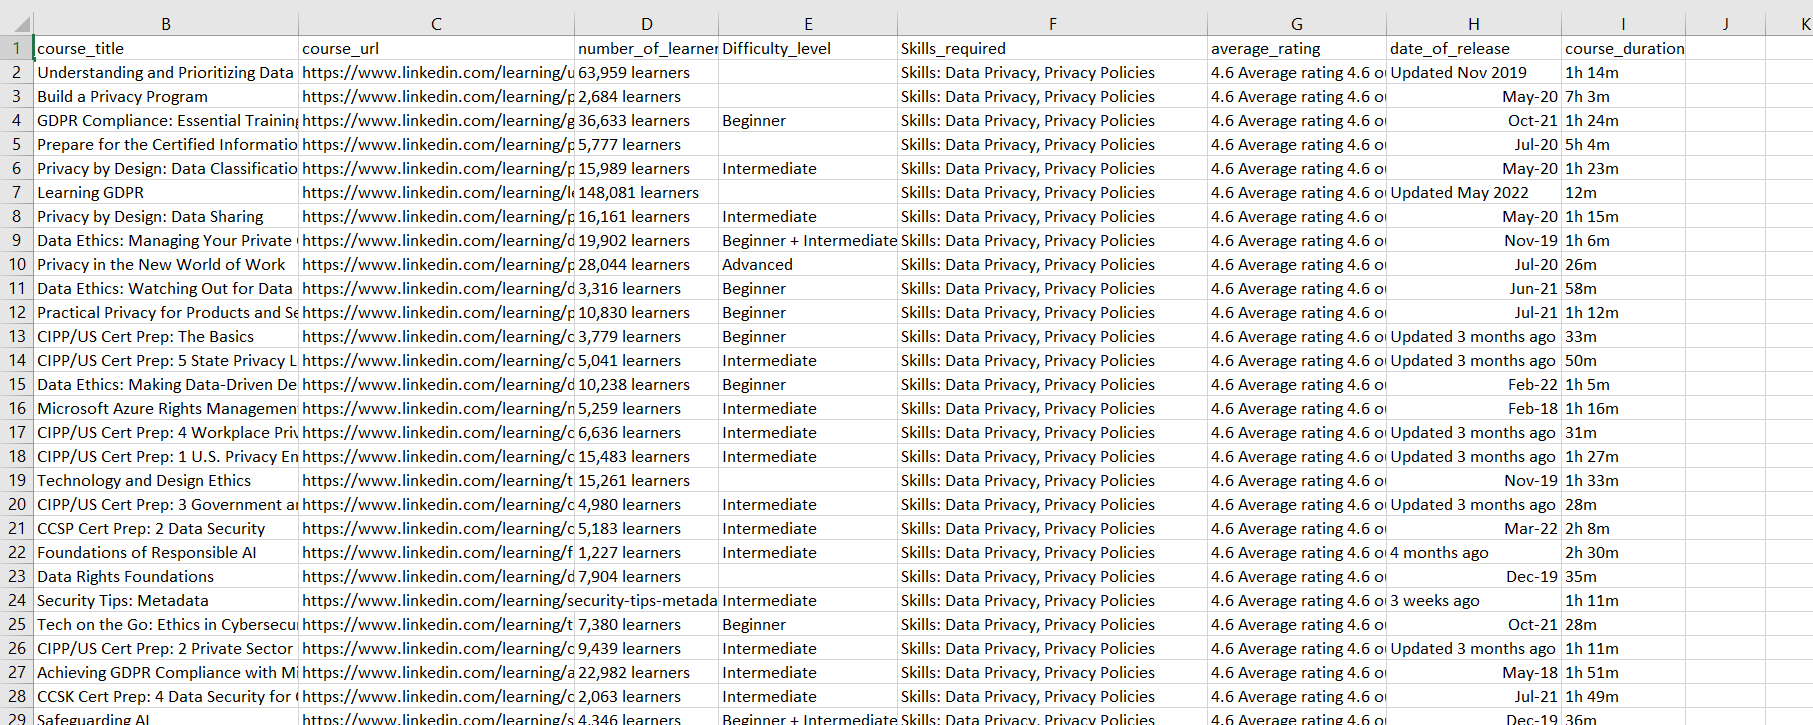

## Summary
#### Here's what we've covered:
1. Automate the webapge using Selenium.
2. Parse the HTML source code.
3. Extracting the information from the page
4. Compiling information in disctioaries.
5. Save the extracted data to the csv file.

## Future Work
* We can now extract the information of the individual topic name and get the list of information for each topic.
* Additional information about each course can be extracted out.
* Considering the other topics available such as Business, Creative, etc. we can extract the information of those topics as well having the different course name.

## References
* [GeeksforGeeks](https://www.geeksforgeeks.org/)
* [Selenium Documentation](https://selenium-python.readthedocs.io/)
* [Python Documentation](https://docs.python.org/)

## Importing the notebook to Jovian

In [79]:
pip install jovian --upgrade

Note: you may need to restart the kernel to use updated packages.


In [78]:
import jovian

<IPython.core.display.Javascript object>

In [80]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Please enter your API key ( from https://jovian.ai/ ):
API KEY: ········
[jovian] Committed successfully! https://jovian.ai/bhavyab1375/linkedin-learning-courses-web-scraping-a132c


'https://jovian.ai/bhavyab1375/linkedin-learning-courses-web-scraping-a132c'